In [202]:
import geopandas as gpd
import pandas as pd
import matplotlib as plt
import pylab as pl
import numpy as np
import fiona
import shapely
from geopandas import GeoDataFrame


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [203]:
ct_shape = GeoDataFrame.from_file('nycb_2010_16d/nycb2010.shp')

In [204]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [205]:
ct_bro = ct_shape[ct_shape['BoroName'] == 'Brooklyn']

In [206]:
# Converting coordinates to lat/lon
ct_bro = ct_bro.to_crs(epsg=4326)
ct_bro.crs 

{'init': 'epsg:4326', 'no_defs': True}

In [207]:
ct_bro.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273368512...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300313,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


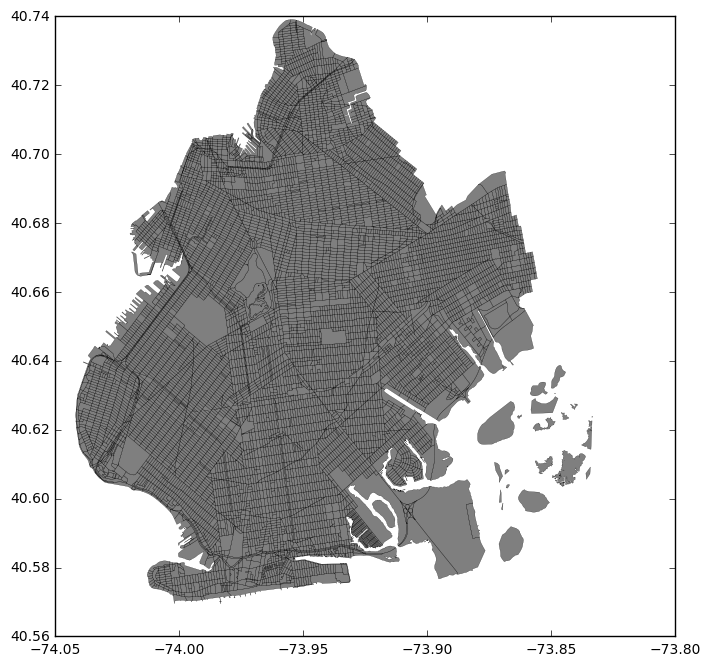

In [255]:
# Plotting extraction (just Brooklyn Borough)
f, ax = plt.subplots(figsize=(8,8))
ct_bro.plot(alpha=0.5, linewidth=0.15, color = 'k', ax = ax)

In [276]:
# 1 Metrotech Center Coordinates (Lat, Lon)
# 40.693298,-73.986446 accordingly to Google Maps
lon = -73.986446
lat = 40.693298
lonlat = (lon, lat)
latlon = (lat, lon)
cusp = shapely.geometry.Point(lonlat)

In [277]:
# Searching for CB that contains CUSP
for i in ct_bro.index:
    geometry = ct_bro.geometry.loc[i]
    if shapely.geometry.asShape(geometry).contains(cusp):
        ct = ct_bro['BCTCB2010'][i]
        ind = i
        print 'CUSP is contained in', geometry

CUSP is contained in POLYGON ((-73.98619262163142 40.69375351897136, -73.98621117787486 40.6933838601358, -73.98622595691906 40.6930883134384, -73.98725396415627 40.69312490276505, -73.98722751058244 40.69379951953569, -73.98619262163142 40.69375351897136))


In [278]:
ct_plot = ct_bro[::10]

In [281]:
ct_plot.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273368512...
5047,30035001000,3,Brooklyn,1000,003500,10469.636350,507.804498,POLYGON ((-73.97551988364874 40.68675683612324...
5057,30054001000,3,Brooklyn,1000,005400,189033.189700,1938.321547,POLYGON ((-74.03649125984289 40.61798915520121...
5067,30067001000,3,Brooklyn,1000,006700,198454.446949,1936.158155,POLYGON ((-73.99440802432692 40.68545249602956...
5077,30084001000,3,Brooklyn,1000,008400,208451.540053,2121.627337,POLYGON ((-74.00041318188852 40.65462870194953...


In [282]:
ct_cusp = GeoDataFrame(ct_bro.loc[ind]).T

In [283]:
ct_cusp

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
35383,30011001009,3,Brooklyn,1009,001100,69934.3,1061.28,POLYGON ((-73.98619262163142 40.69375351897136...


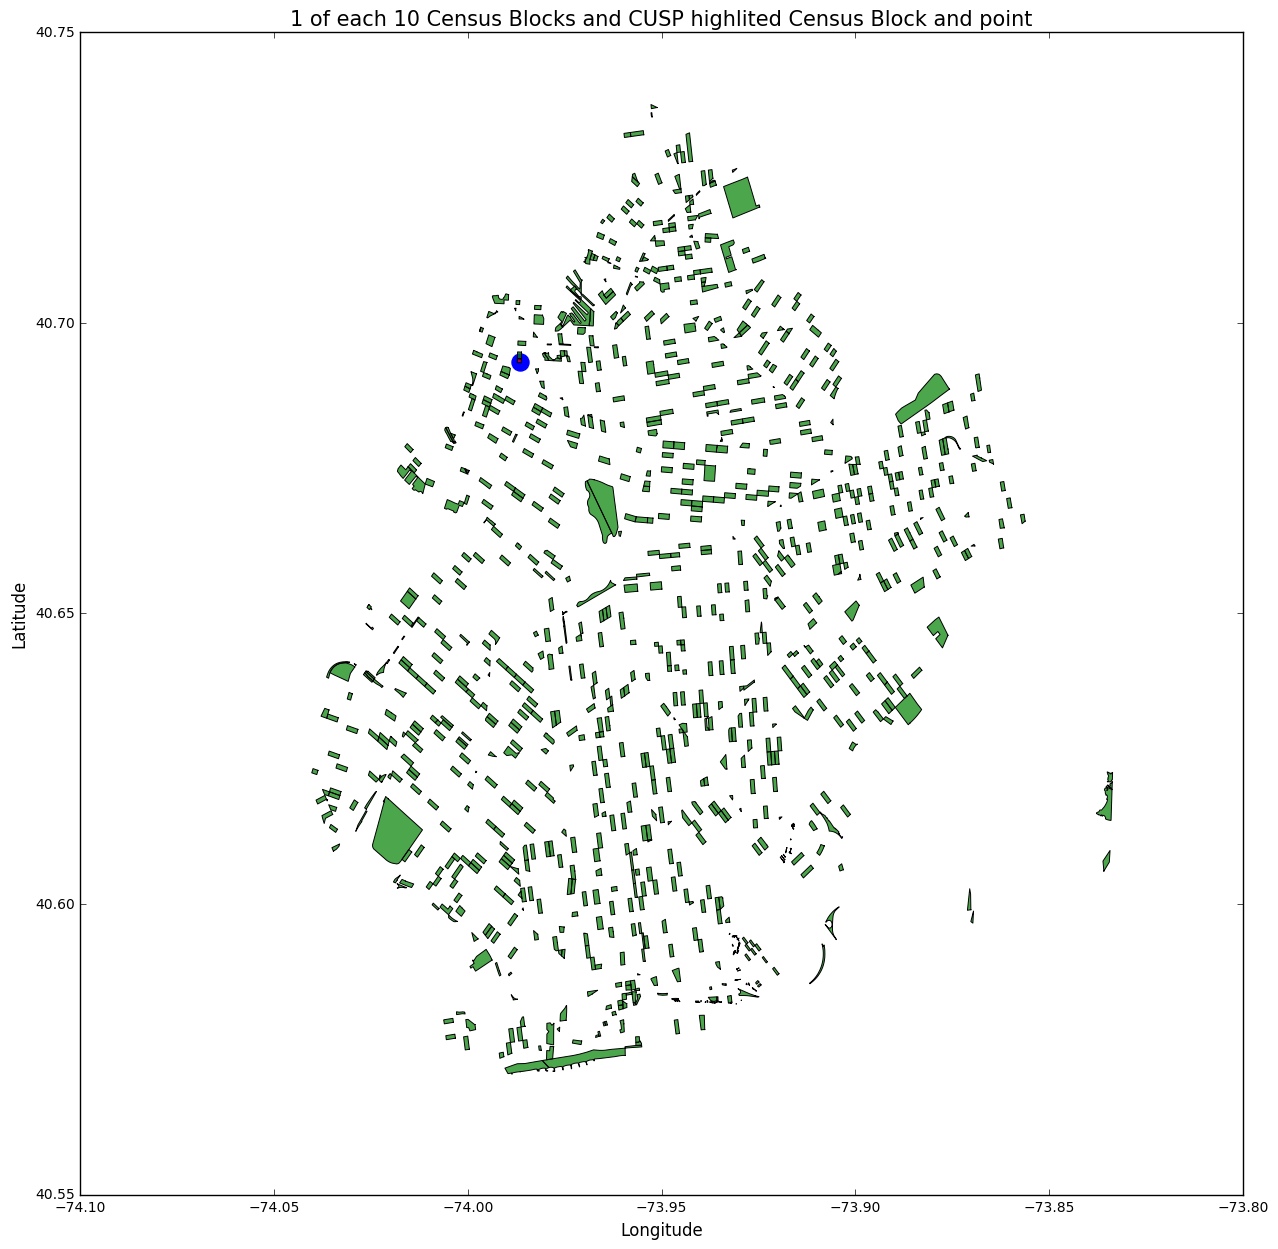

In [284]:
# Plotting Basemap
f, ax = plt.subplots(figsize=(15,15))
ct_plot.plot(alpha=0.7, linewidth=0.7, color = 'g', ax = ax)

# Plotting CUSP ct and CUSP point
ax.scatter(cusp.x, cusp.y, 150, color = 'b')
ct_cusp.plot(alpha=0.7, linewidth=0.7, color = 'r', ax = ax)

plt.title('1 of each 10 Census Blocks and CUSP highlited Census Block and point', fontsize = 15)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
